In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Downloading the zipfile and extracting

!gdown 11R-D1robYjdyMZ4KooWuAlZH1WyRpCdl

Downloading...
From (original): https://drive.google.com/uc?id=11R-D1robYjdyMZ4KooWuAlZH1WyRpCdl
From (redirected): https://drive.google.com/uc?id=11R-D1robYjdyMZ4KooWuAlZH1WyRpCdl&confirm=t&uuid=4c7c889f-966e-4440-886f-b55013b2308b
To: /content/BrainTumor_1.zip
100% 514M/514M [00:16<00:00, 31.4MB/s]


In [3]:
# Unzip the file
import zipfile

zip_ref = zipfile.ZipFile("BrainTumor_1.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
# Lets store our training and testing directories

# train_dir = "BrainTumor_1/Train"
# test_dir = "BrainTumor_1/Test"

train_dir = "/content/BrainTumor_1/Train"
test_dir =  "/content/BrainTumor_1/Test"

Text(3, 6380, '6380')

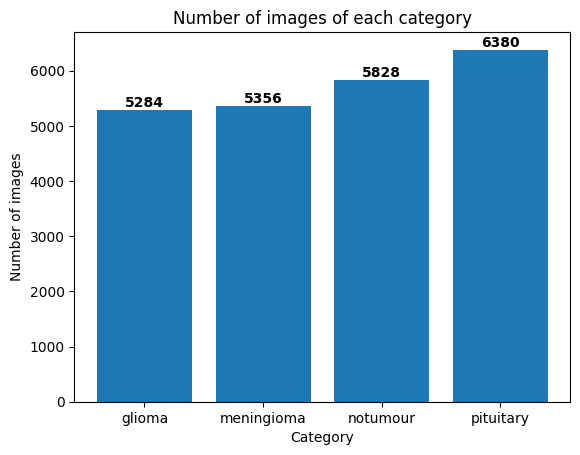

In [5]:
# Plotting the number of images of each category
import os

glioma_count = len(os.listdir("/content/BrainTumor_1/Train/glioma"))
meningioma_count = len(os.listdir("/content/BrainTumor_1/Train/meningioma"))
pituitary_count = len(os.listdir("/content/BrainTumor_1/Train/notumor"))
no_tumor_count = len(os.listdir("/content/BrainTumor_1/Train/pituitary"))
plt.bar(["glioma","meningioma","notumour","pituitary"],[glioma_count,meningioma_count,no_tumor_count,pituitary_count])
plt.title("Number of images of each category")
plt.xlabel("Category")
plt.ylabel("Number of images")

plt.text(0,glioma_count,s=glioma_count,fontweight='bold',fontsize='medium',ha='center',va='bottom')
plt.text(1,meningioma_count,s=meningioma_count,fontweight='bold',fontsize='medium',ha='center',va='bottom')
plt.text(2,no_tumor_count,s=no_tumor_count,fontweight='bold',fontsize='medium',ha='center',va='bottom')
plt.text(3,pituitary_count,s=pituitary_count,fontweight='bold',fontsize='medium',ha='center',va='bottom')

(345, 300, 3)

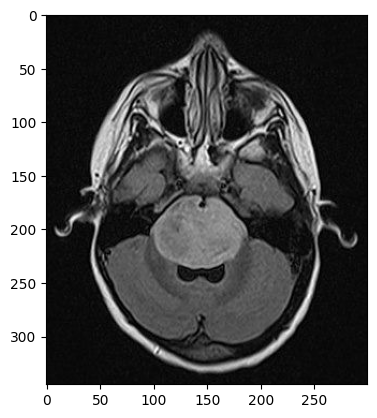

In [6]:
# Testing the shape of one image to understand the dimensions
import matplotlib.image as mpimg
image = mpimg.imread("/content/BrainTumor_1/Train/meningioma/0200.jpg")
plt.imshow(image)
image.shape

In [7]:
# Getting the data loaders ready to load data into variables

from tensorflow.keras.preprocessing import image_dataset_from_directory


train_data,validation_data = image_dataset_from_directory(directory=train_dir,
                                          label_mode='int',
                                          color_mode='grayscale',
                                          batch_size=32,
                                          image_size=(128,128),
                                          seed=42,
                                          subset="both",
                                          validation_split=0.2,
                                          shuffle=True)

test_data = image_dataset_from_directory(directory=test_dir,
                                          label_mode='int',
                                          color_mode='grayscale',
                                          batch_size=32,
                                          image_size=(128,128),
                                          seed=42,
                                          shuffle=True)

Found 22848 files belonging to 4 classes.
Using 18279 files for training.
Using 4569 files for validation.
Found 1311 files belonging to 4 classes.


In [8]:
# Lets store the class names to access them

class_names = train_data.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [9]:
import numpy as np

# Initialize counts
n_glioma = 0
n_meningioma = 0
n_notumor = 0
n_pituitary = 0


for images, labels in train_data:
    labels_np = labels.numpy()


    for label in labels_np:
        if class_names[int(label)] == 'glioma':
            n_glioma += 1
        elif class_names[int(label)] == 'meningioma':
            n_meningioma += 1
        elif class_names[int(label)] == 'notumor':
            n_notumor += 1
        elif class_names[int(label)] == 'pituitary':
            n_pituitary += 1


print("Number of samples for each class:")
print("Glioma:", n_glioma)
print("Meningioma:", n_meningioma)
print("No Tumor:", n_notumor)
print("Pituitary:", n_pituitary)

print(n_glioma+n_meningioma+n_notumor+n_pituitary)


Number of samples for each class:
Glioma: 4230
Meningioma: 4332
No Tumor: 5098
Pituitary: 4619
18279


In [10]:
# Calculate the weights of each class to deal wiht class imbalances

glioma_weight = 0
meningioma_weight = 0
notumor_weight = 0
pituitary_weight =0
n = 18279

class_count = np.array([4230,4332,5098,4619])

class_weights = {0:glioma_weight,1:meningioma_weight,2:notumor_weight,3:pituitary_weight}

for i in range(4):
    class_weights[i] = (n/(4*class_count[i]))

class_weights


{0: 1.0803191489361703,
 1: 1.054882271468144,
 2: 0.89638093369949,
 3: 0.9893375189434943}

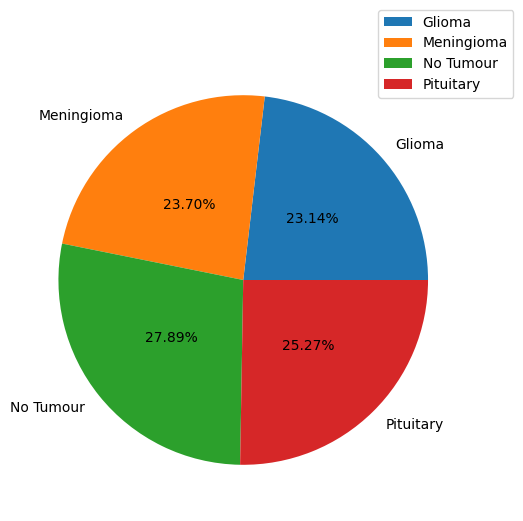

In [11]:
import matplotlib.pyplot as plt

samples_count = [4230, 4332, 5098, 4619]
samples_percentage = []
total = sum(samples_count)

for i in samples_count:
    k = i / total
    samples_percentage.append(k)

plt.figure(figsize=(6, 6))
plt.pie(
    samples_count,
    labels=["Glioma", "Meningioma", "No Tumour", "Pituitary"],
    autopct=lambda p: f'{p:.2f}%',
    pctdistance=0.5,
    labeldistance=1.1,
    colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
)

plt.legend(["Glioma", "Meningioma", "No Tumour", "Pituitary"], bbox_to_anchor=(1.1, 1.1))

plt.show()


tf.Tensor(1, shape=(), dtype=int32)
(128, 128, 1)


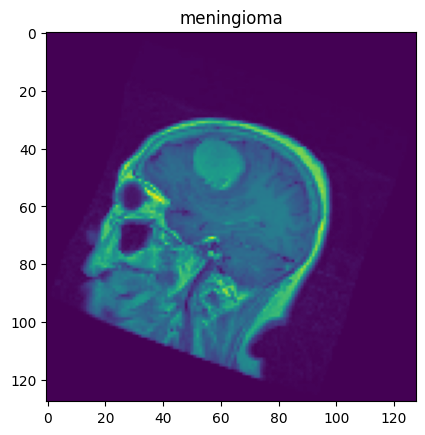

In [12]:
# Lets take an image and check its shape

for image,labels in train_data.take(1):
  plt.imshow(image[0]) #view the first image of the batch
  print(labels[0]) #view label of first image
  plt.title(f"{class_names[labels[0]]}")
  print(image[0].shape)

In [13]:
# Create a function to view multiple images at once

def view_images(train_data):
  for images,labels in train_data.take(1):
    plt.figure(figsize=(6,6))
    for i in range(4):
      plt.subplot(2,2,i+1)
      plt.imshow(images[i])
      plt.title(f"{class_names[labels[i]]}")
      plt.xlabel(f"{images[i].shape}")
    plt.tight_layout()



In [14]:
# Check the min and max values of image vector(if needed rescale)
for images,labels in train_data.take(1):
  print(tf.reduce_min(images[0]))
  print(tf.reduce_max(images[0]))

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(255.0, shape=(), dtype=float32)


In [15]:
# Create a custom function and combine with tensorflow function to convert batches of images to rgb


def grayscale_to_rgb(images,labels):
  images = tf.image.grayscale_to_rgb(images)
  return images,labels

train_data = train_data.map(grayscale_to_rgb)
validation_data = validation_data.map(grayscale_to_rgb)
test_data = test_data.map(grayscale_to_rgb)



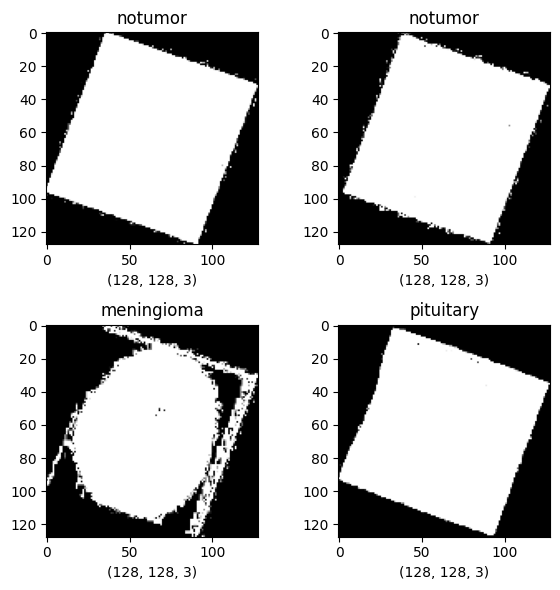

In [16]:
# Lets check if our images are succesfully converted to rgb
view_images(train_data)

In [17]:
# Lets check the min and max values of the images

for images,labels in train_data.take(1):
  print(tf.reduce_min(images[0]))
  print(tf.reduce_max(images[0]))

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(255.0, shape=(), dtype=float32)


In [18]:
# Lets retrieve number of batches

len(train_data)

572

In [19]:
from tensorflow.keras import layers
# create a  rescaling layer

rescale_layer = layers.Rescaling(1/255.)

In [20]:
# Lets rescale the images batch-wise

def rescale_over_batches(images,labels):
  images = rescale_layer(images)
  return images,labels

train_data = train_data.map(rescale_over_batches)
validation_data = validation_data.map(rescale_over_batches)
test_data = test_data.map(rescale_over_batches)

In [21]:
for images,labels in train_data.take(1):
  print(tf.reduce_min(images[0]))
  print(tf.reduce_max(images[0]))

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.9048564, shape=(), dtype=float32)


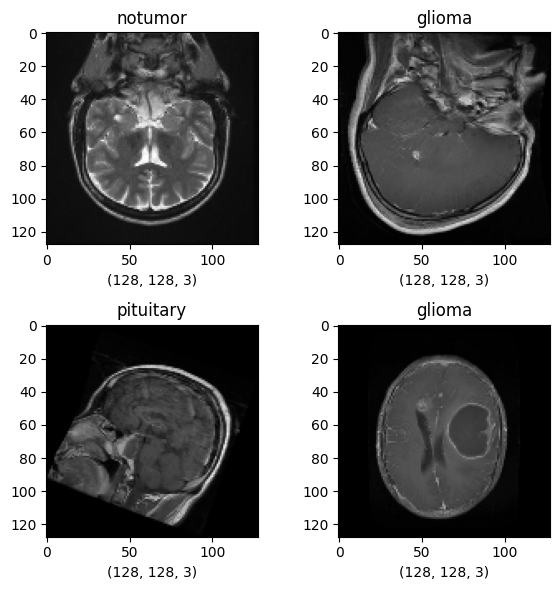

In [22]:
# Since rescaling is done lets again try to view the images

view_images(train_data)

# Model Building

## Xception Pre-Trained Model

In [41]:
from tensorflow.keras.applications import Xception

base_model = Xception(include_top=False)
base_model.trainable = False

In [42]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(128,128,3))

x = tf.keras.applications.xception.preprocess_input(inputs)

x = base_model(x,training=False)

x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = tf.keras.activations.relu(x)

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = tf.keras.activations.relu(x)

x = layers.Dense(64)(x)
x = layers.BatchNormalization()(x)
x = tf.keras.activations.relu(x)

x = layers.Dropout(0.7)(x)

outputs = layers.Dense(4,activation="softmax")(x)

model =  tf.keras.Model(inputs,outputs)


In [43]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide_1 (TrueDivide)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract_1 (Subtract)                │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 4, 4, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,429,228 (81.75 MB)

 Trainable params: 566,852 (2.16 MB)

 Non-trainable params: 20,862,376 (79.58 MB)

In [44]:
def plot_loss_curves(history):
  train_loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  train_accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  plt.figure()
  plt.subplot(2,1,1)
  plt.title("Loss curves")
  plt.plot(train_loss,label="Training Loss")
  plt.plot(val_loss,label="Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("loss")
  plt.legend()


  plt.subplot(2,1,2)
  plt.title("Accuracy curves")
  plt.plot(train_accuracy,label="Training Accuracy")
  plt.plot(val_accuracy,label="Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.tight_layout()

In [45]:
for i,layer in enumerate(base_model.layers[-10:]):
  print(i,layer.name)

0 conv2d_7
1 block13_pool
2 batch_normalization_10
3 add_23
4 block14_sepconv1
5 block14_sepconv1_bn
6 block14_sepconv1_act
7 block14_sepconv2
8 block14_sepconv2_bn
9 block14_sepconv2_act


In [46]:
len(base_model.layers)

132

In [47]:
# Unfreeze the layer
base_model.trainable = False

for layer in base_model.layers[-120:]:
  layer.trainable = True

In [48]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
reduce_lr = ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.1,
                                        patience=2,
                                        verbose=1,
                                        min_lr=1e-8)

early_stopping = EarlyStopping(monitor="val_loss",
                                        patience=3,
                                        verbose=1)


checkpoint_path = "densenet169_fine_tune.weights.h5"
checkpoint = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_loss",
                                      save_best_only=True)

csv_logger = tf.keras.callbacks.CSVLogger("densenet169_fine_tune.csv")

In [49]:
# re compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [50]:
history = model.fit(train_data,
          epochs=25,
          validation_data=validation_data,
          class_weight=class_weights,
          callbacks=[reduce_lr,checkpoint,csv_logger])

Epoch 1/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 142s 183ms/step - accuracy: 0.5246 - loss: 1.2137 - val_accuracy: 0.3355 - val_loss: 1.9051 - learning_rate: 1.0000e-04
Epoch 2/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 90s 157ms/step - accuracy: 0.8307 - loss: 0.5030 - val_accuracy: 0.2994 - val_loss: 1.9284 - learning_rate: 1.0000e-04
Epoch 3/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 87s 153ms/step - accuracy: 0.9000 - loss: 0.3307 - val_accuracy: 0.4075 - val_loss: 1.6112 - learning_rate: 1.0000e-04
Epoch 4/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 85s 148ms/step - accuracy: 0.9180 - loss: 0.2959 - val_accuracy: 0.3412 - val_loss: 2.3611 - learning_rate: 1.0000e-04
Epoch 5/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 90s 157ms/step - accuracy: 0.9496 - loss: 0.2012 - val_accuracy: 0.3883 - val_loss: 1.5807 - learning_rate: 1.0000e-04
Epoch 6/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 89s 156ms/step - accuracy: 0.9612 - loss: 0.1507 - val_accuracy: 0.5117 - val_loss: 2.2272 - learning_rate: 1.0000e-04
Epoch 7/25
572/572 ━━━━━━━━━━━━━━━━━━━━ 0s 13

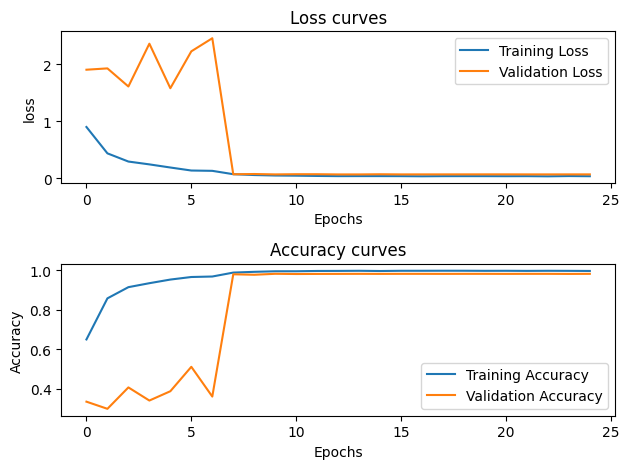

In [51]:
plot_loss_curves(history)

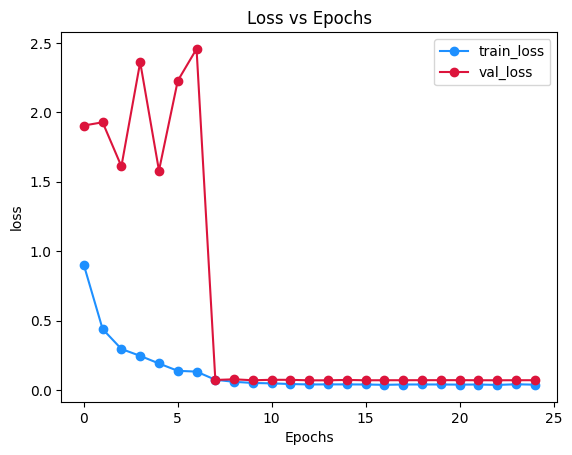

In [52]:
plt.figure()
plt.plot(history.history["loss"],label="train_loss",c="dodgerblue",marker='o')
plt.plot(history.history["val_loss"],label="val_loss",c="crimson",marker='o')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Loss vs Epochs")
plt.legend()


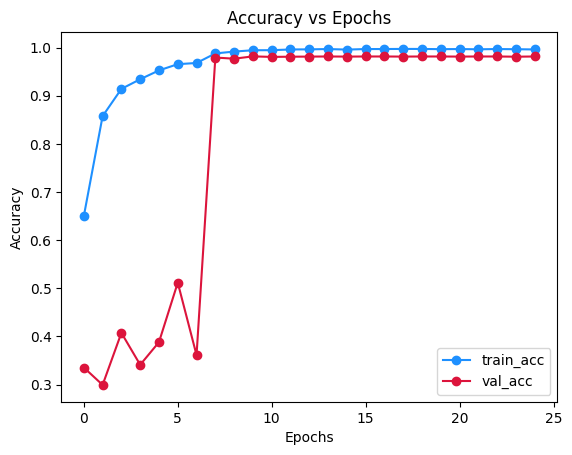

In [53]:
plt.figure()
plt.plot(history.history["accuracy"],label="train_acc",c="dodgerblue",marker="o")
plt.plot(history.history["val_accuracy"],label="val_acc",c="crimson",marker="o")
plt.xlabel("Epochs")
plt.title("Accuracy vs Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [54]:
model.load_weights(checkpoint_path)

In [55]:
model.evaluate(test_data)

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9741 - loss: 0.0919


[0.09294752031564713, 0.9763539433479309]

In [56]:
y_true = []
y_pred = []

for xlabel, ylabel in test_data:
    prediction = model.predict(xlabel)
    y_pred.extend(np.argmax(prediction, axis=1))
    y_true.extend(ylabel.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━

In [60]:
from sklearn.metrics import classification_report, recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, roc_auc_score
import numpy as np

# Assuming y_true and y_pred are the ground truth and predicted labels
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average=None, zero_division=0)
f1 = f1_score(y_true, y_pred, average=None, zero_division=0)
recall = recall_score(y_true, y_pred, average=None, zero_division=0)
confusion_matrix = confusion_matrix(y_true, y_pred)

print(f"Accuracy Score: {accuracy}\n")
print(f"Precision Score: {precision}\n")
print(f"F1 Score: {f1}\n")
print(f"Recall Score: {recall}\n")
print(f"Confusion Matrix:\n{confusion_matrix}")


Accuracy Score: 0.9763539282990084

Precision Score: [0.97627119 0.95469256 0.98762376 0.98349835]

F1 Score: [0.96806723 0.95934959 0.98640297 0.98839138]

Recall Score: [0.96       0.96405229 0.98518519 0.99333333]

Confusion Matrix:
[[288  10   0   2]
 [  4 295   4   3]
 [  3   3 399   0]
 [  0   1   1 298]]


Text(50.72222222222221, 0.5, 'True Label')

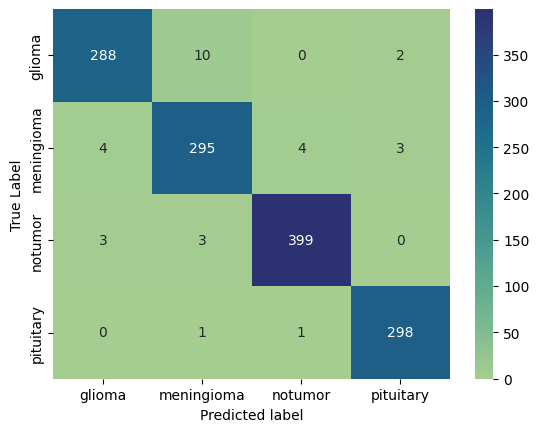

In [61]:
import seaborn as sns
plt.figure()
sns.heatmap(confusion_matrix,annot=True,
           xticklabels=class_names,
           yticklabels=class_names,fmt=".0f",cmap="crest")
plt.xlabel('Predicted label')
plt.ylabel('True Label')



## Saving the model

In [62]:
model.save("xception_model.keras")